In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip3 install seaborn

In [8]:
#GridSearch / cross validation에서 사용되는 scoring에 대해 사용자 정의

from sklearn.metrics import confusion_matrix, make_scorer

def cost_function(y,y_pred):
    conf_mat = confusion_matrix(y, y_pred, normalize="all")
    cost = sum(sum(conf_mat*cost_matrix))
    return cost

score = make_scorer(cost_function, greater_is_better = True)

#사용 예시는 아래에

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

url = 'https://drive.google.com/file/d/1vM9N1TLNAZkNgwh2bEsX0NCmI5o2hfKI/view?usp=sharing'
def f(x):
    y = 'https://drive.google.com/uc?export=download&id='+x.split('/')[-2]
    return y

df = pd.read_csv(f(url))
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])

X = df.drop('left',axis=1)
y = df['left']

X = np.array(X)
y = np.array(y)

In [7]:
#K-NN cost.mat에 따른 hyperparameter tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1,100)              # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_cost = []                     # 각 k들의 성능을 비교하기 위한 리스트생성이다.

#GridSearch / cross validation에서 사용되는 scoring에 대해 사용자 정의

cost_matrix = [[0, -346],[-3130, -346]]
    
def cost_function(y,y_pred):
    conf_mat = confusion_matrix(y, y_pred, normalize="all")
    cost = sum(sum(conf_mat*cost_matrix))
    return cost

score = make_scorer(cost_function, greater_is_better = True)

#####

for k in k_range :
    kn = KNeighborsClassifier(n_neighbors=k)
    result = cross_val_score(kn,X,y,cv=5,scoring = score)
    k_cost.append(np.mean(result))
    print(k)


NameError: name 'make_scorer' is not defined

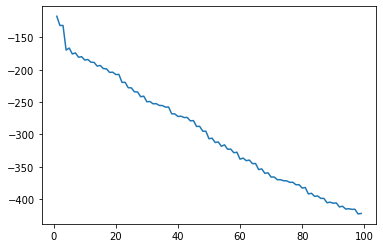

In [40]:
plt.plot(range(1,100),k_cost)

In [51]:
k_cost[0]

-117.16421469378682

In [9]:
#오버샘플링

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE

cv = StratifiedKFold(n_splits = 5)

costf = []
cost = []

for j in range(1,100):
    print(j)
    for i, (train, test) in enumerate(cv.split(X, y)):
        kn = KNeighborsClassifier(n_neighbors=j)
        oversample = BorderlineSMOTE()
        X1, y1 = oversample.fit_resample(X[train], y[train])
        kn.fit(X1, y1)
    
        X_train_preds = kn.predict(X[test])
        y_train_targs = y[test]
    
        costf.append(cost_function(X_train_preds, y_train_targs))
    cost.append(np.mean(costf))
    costf = []

1


TypeError: cost_function() got an unexpected keyword argument 'normalize'

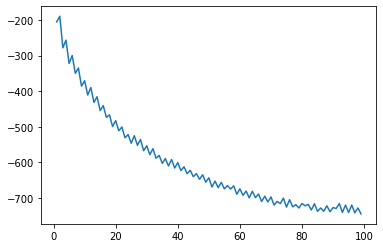

In [41]:
plt.plot(range(1,100), cost)

In [50]:
cost[1]

-189.42895960875845

In [42]:
#언더샘플링

from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss

cv = StratifiedKFold(n_splits = 5)

costf = []
cost_u = []

for j in range(1,100):
    print(j)
    for i, (train, test) in enumerate(cv.split(X, y)):
        kn = KNeighborsClassifier(n_neighbors=j)
        undersample = NearMiss(version=1, n_neighbors=3)
        X1, y1 = undersample.fit_resample(X, y)
        kn.fit(X1, y1)
    
        X_train_preds = kn.predict(X[test])
        y_train_targs = y[test]
    
        costf.append(cost_function(X_train_preds, y_train_targs))
    cost_u.append(np.mean(costf))
    costf = []

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


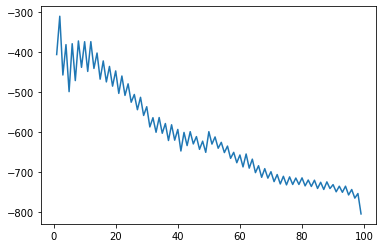

In [43]:
plt.plot(range(1,100), cost_u)

In [49]:
cost_u[1]

-309.43038341669444